In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("Admission_Predict.csv")

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.columns = ['Serial', 'GRE', 'TOEFL', 'Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Admit']

In [7]:
df.head()

,Serial,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = df.drop('Rating', 1)
Y = df['Rating']
X = pd.get_dummies(X)

cross_val_score(rfc, X, Y, cv=10)

array([0.52380952, 0.52380952, 0.42857143, 0.48780488, 0.525     ,
       0.65      , 0.56410256, 0.52631579, 0.47368421, 0.57894737])

In [11]:
pd.get_dummies(df).head()

,Serial,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [16]:
import time
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.696846008300781e-05 seconds ---


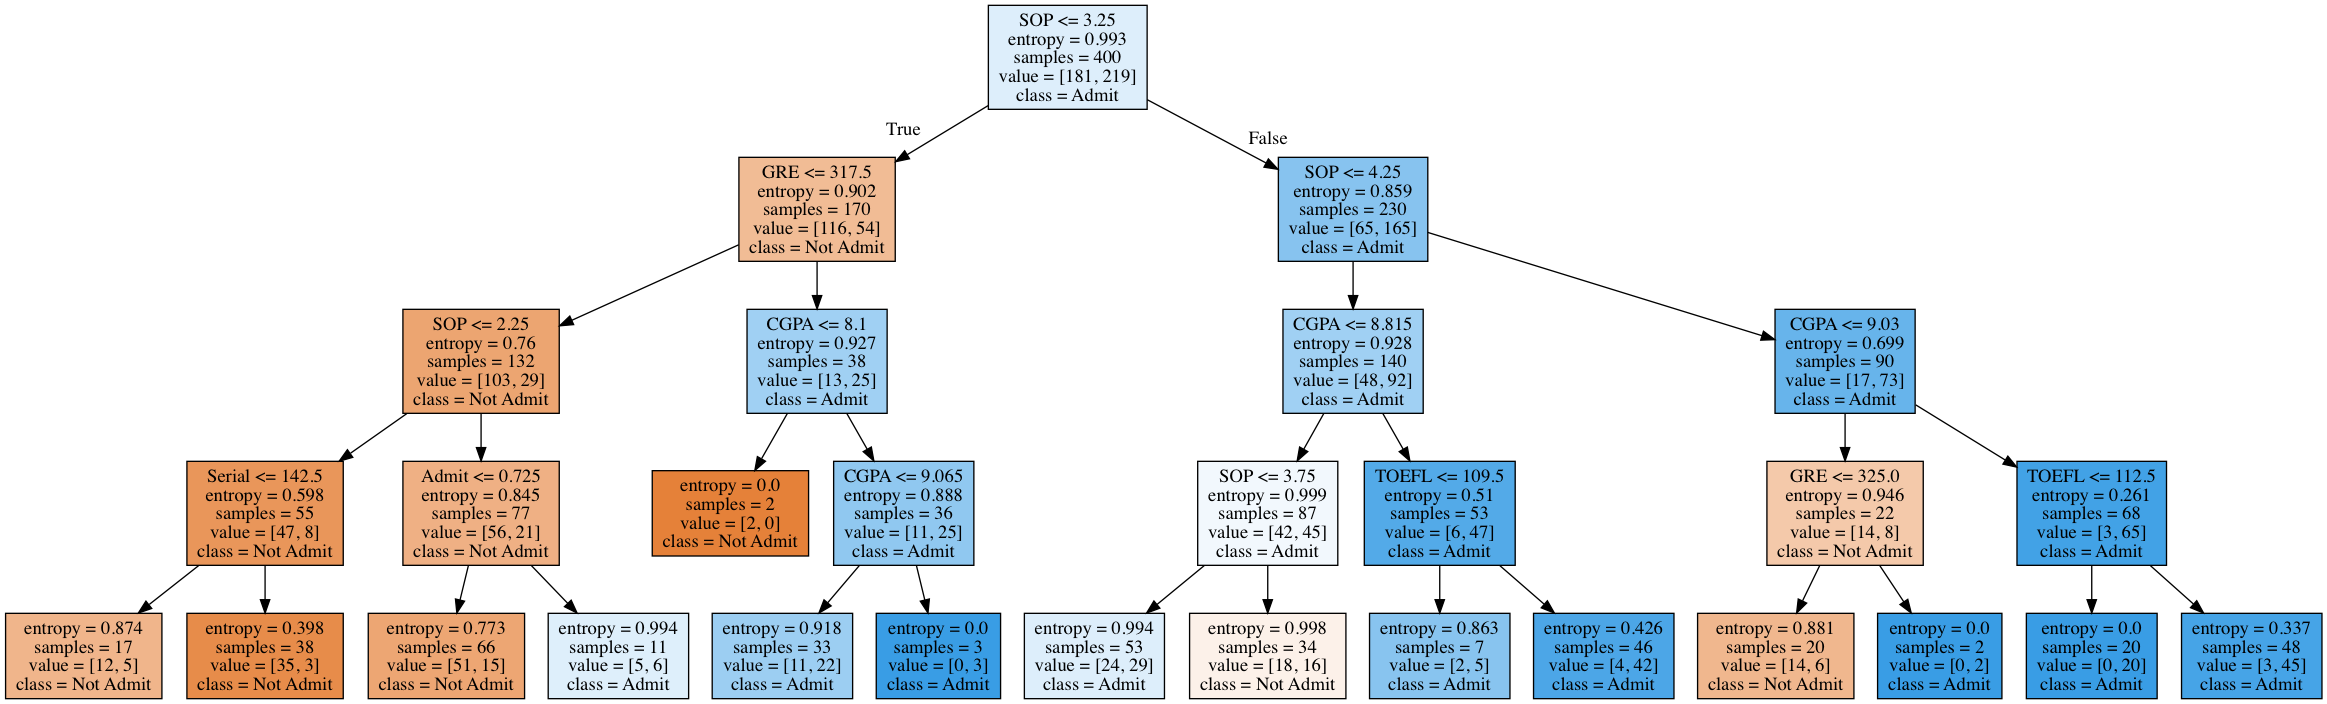

In [25]:



from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(df, df['Research'])

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names= df.columns,
    class_names = ['Not Admit', 'Admit'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [24]:
import time
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.1961669921875e-05 seconds ---
